HOUSE PRICE PREDICTIONS

In [ ]:
# Generic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


In [ ]:
# Dataset
df = pd.read_csv('/content/sample_data/csv project.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
3,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
4,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY


In [ ]:
df.shape

(18565, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18565 non-null  float64
 1   latitude            18565 non-null  float64
 2   housing_median_age  18565 non-null  int64  
 3   total_rooms         18565 non-null  int64  
 4   total_bedrooms      18376 non-null  float64
 5   population          18565 non-null  int64  
 6   households          18565 non-null  int64  
 7   median_income       18565 non-null  float64
 8   median_house_value  18565 non-null  int64  
 9   ocean_proximity     18565 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB


In [ ]:
## Finding Missing Values

df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,189
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df.isnull().sum()/df.shape[0]*100

,0
longitude,0.000000
latitude,0.000000
housing_median_age,0.000000
total_rooms,0.000000
total_bedrooms,1.018045
population,0.000000
households,0.000000
median_income,0.000000
median_house_value,0.000000
ocean_proximity,0.000000


In [ ]:
## Finding Duplicates

df.duplicated().sum()

np.int64(0)

In [ ]:
## Missing value treatment using KNN Imputer

from sklearn.impute import KNNImputer
impute=KNNImputer()

for i in df.select_dtypes(include="number").columns:
  df[i]=impute.fit_transform(df[[i]])

In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
## Exploratory Data Analysis (EDA)
# Descriptive Statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,18565.0,-119.570116,2.002922,-124.3500,-121.8000,-118.5000,-118.0100,-114.3100
latitude,18565.0,35.633888,2.137014,32.5400,33.9300,34.2600,37.7100,41.9500
housing_median_age,18565.0,28.615890,12.564224,1.0000,18.0000,29.0000,37.0000,52.0000
total_rooms,18565.0,2634.033827,2195.915548,2.0000,1442.0000,2123.0000,3141.0000,39320.0000
total_bedrooms,18376.0,537.711199,424.125849,2.0000,295.0000,434.0000,646.0000,6445.0000
population,18565.0,1426.223108,1142.570832,3.0000,786.0000,1166.0000,1725.0000,35682.0000
households,18565.0,499.450902,384.553175,2.0000,279.0000,408.0000,603.0000,6082.0000
median_income,18565.0,3.867012,1.895988,0.4999,2.5612,3.5341,4.7411,15.0001
median_house_value,18565.0,206617.794991,115447.104881,14999.0000,119300.0000,179400.0000,264400.0000,500001.0000


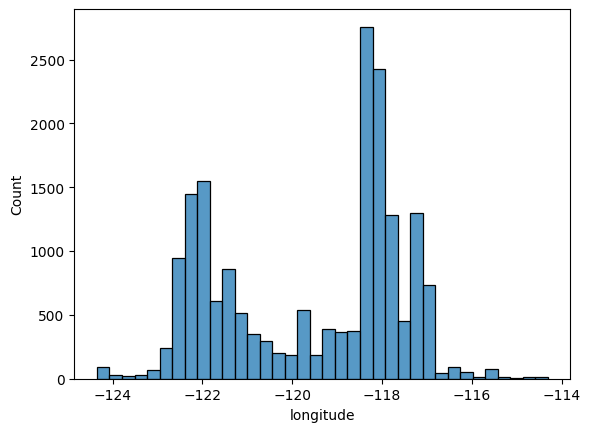

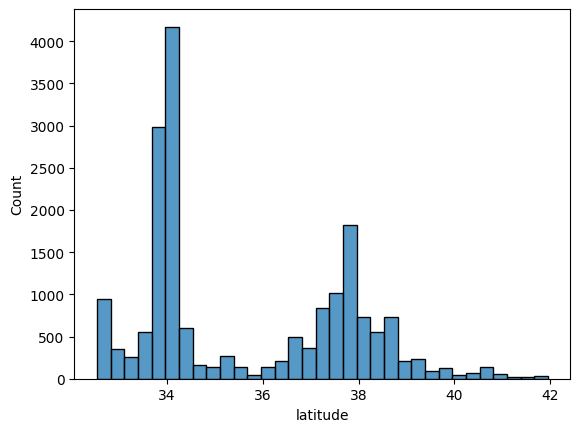

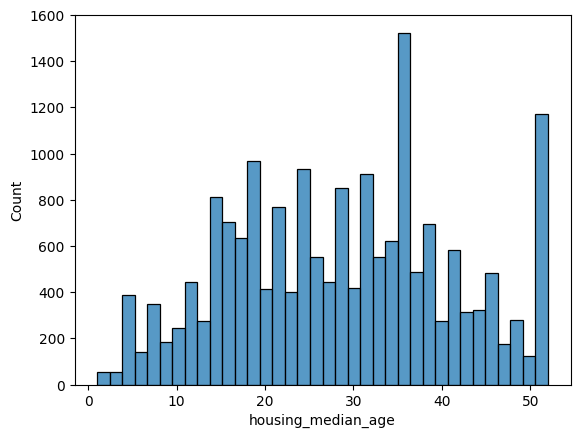

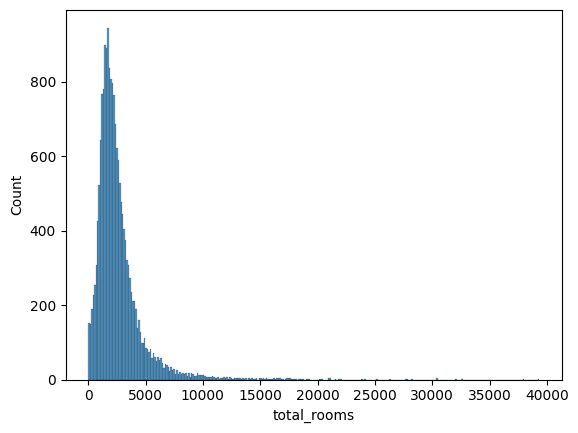

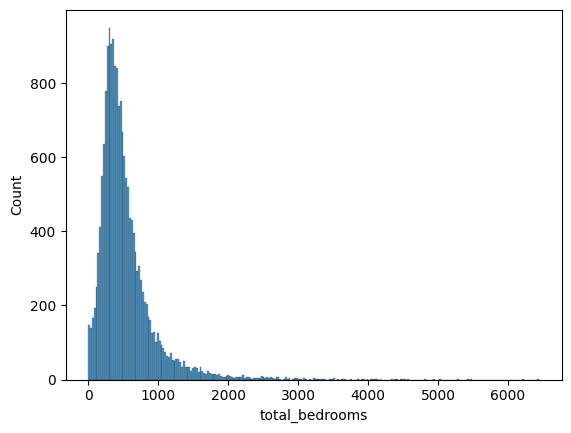

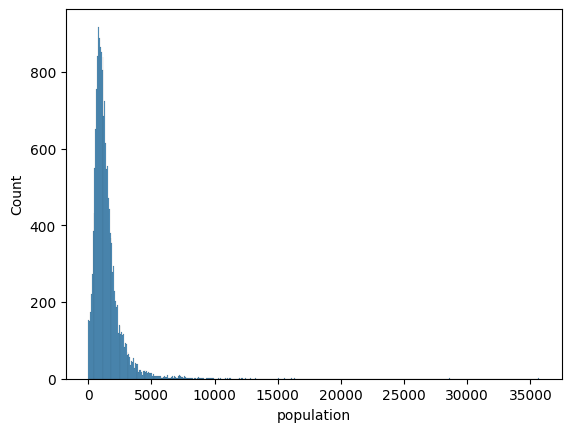

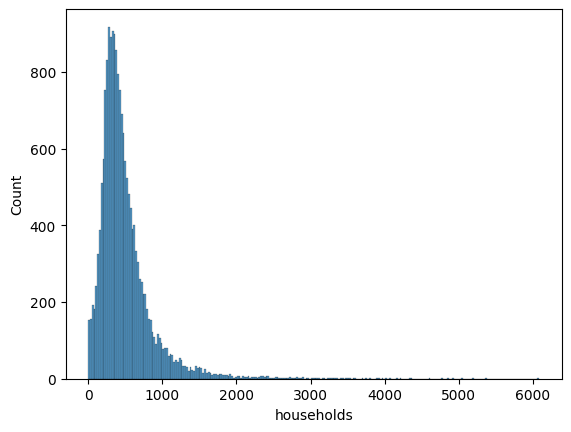

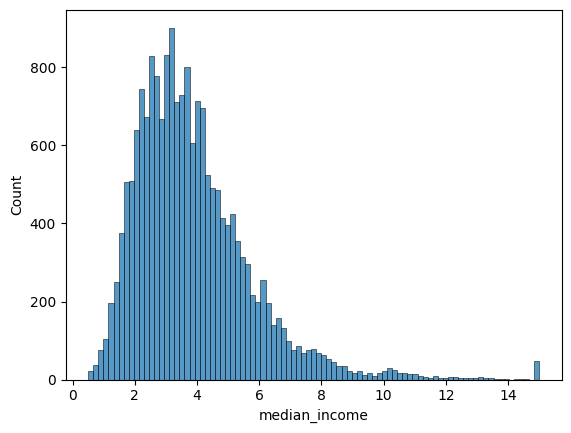

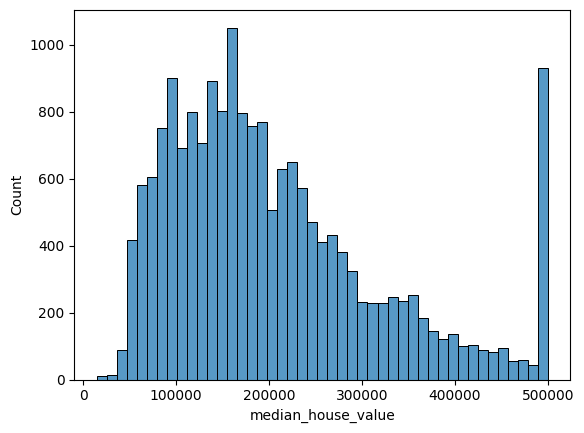

In [ ]:
# Use Histogram to understand the distribution

import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df, x=i)
  plt.show()

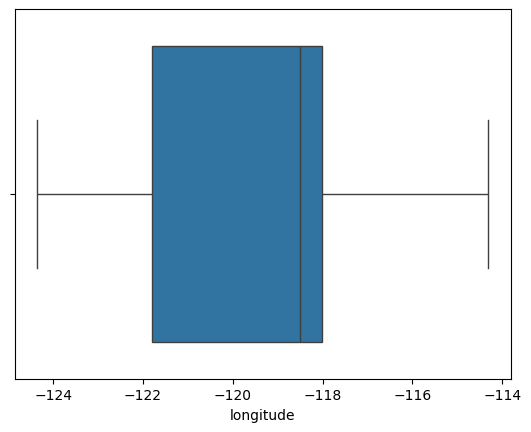

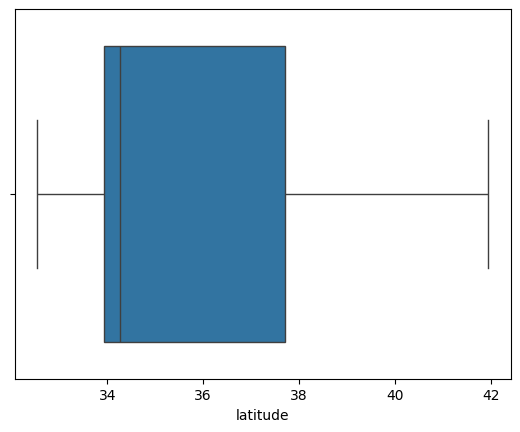

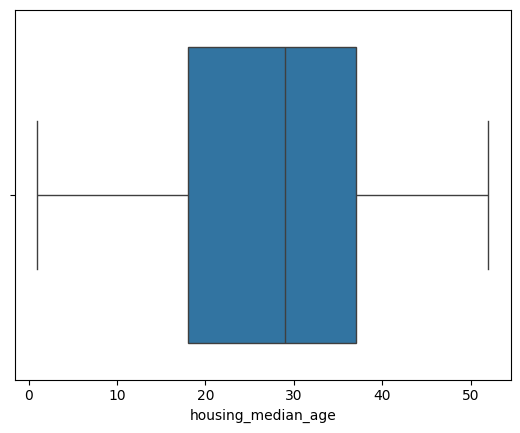

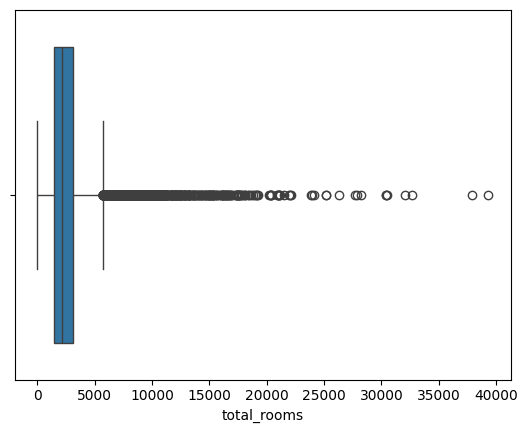

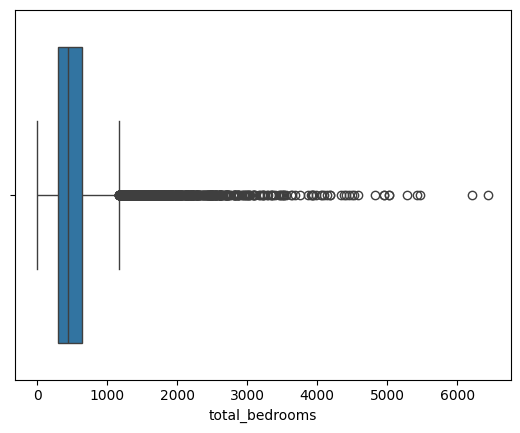

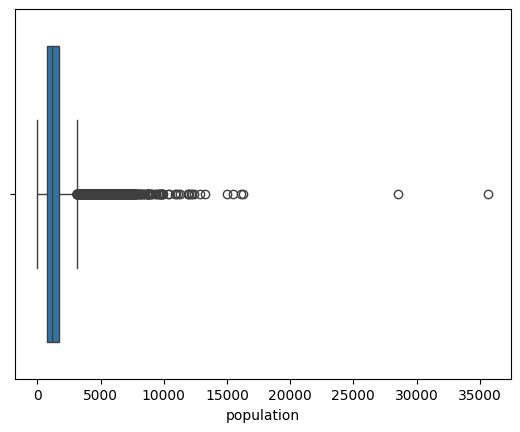

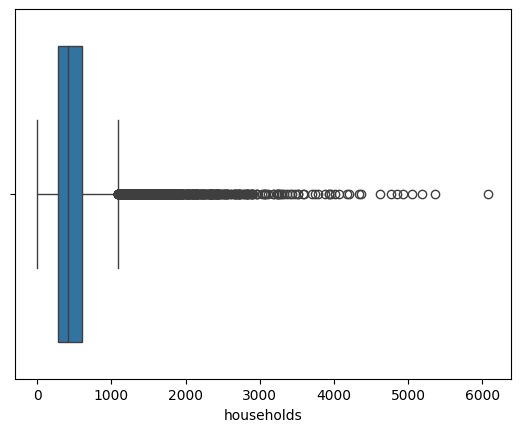

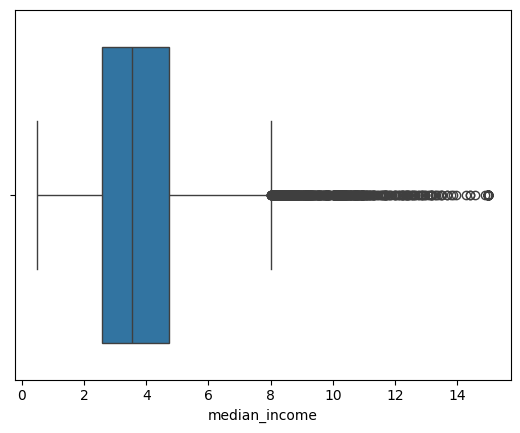

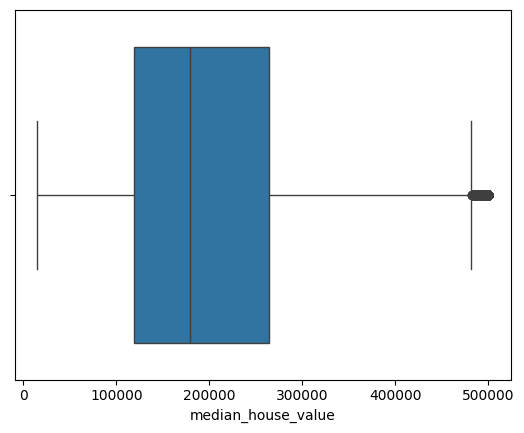

In [ ]:
## Identification of Outliers using Boxplot

import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df, x=i)
  plt.show()

In [ ]:
## Understanding the relationship of the Data

df.select_dtypes(include="number").columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

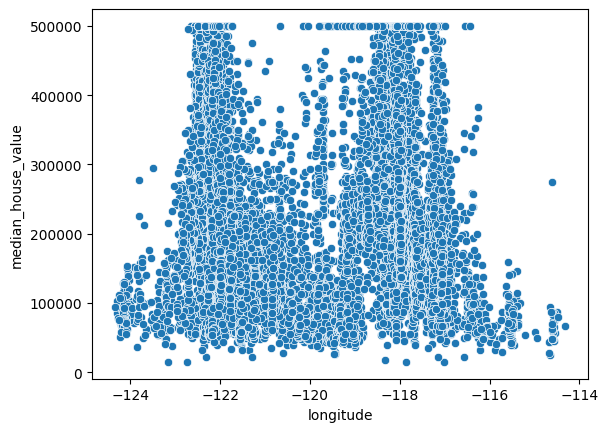

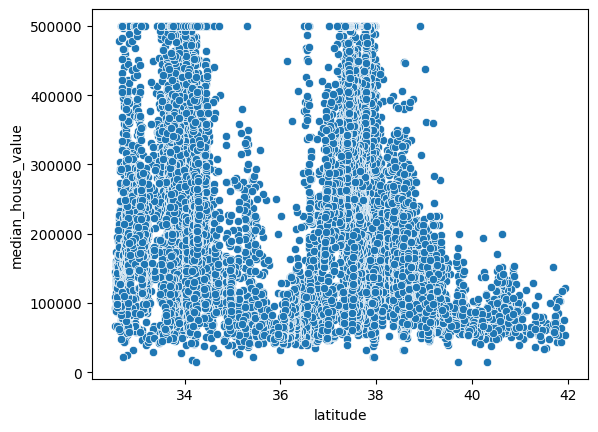

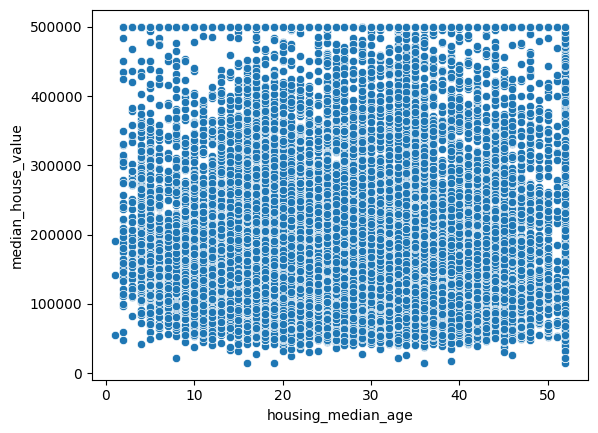

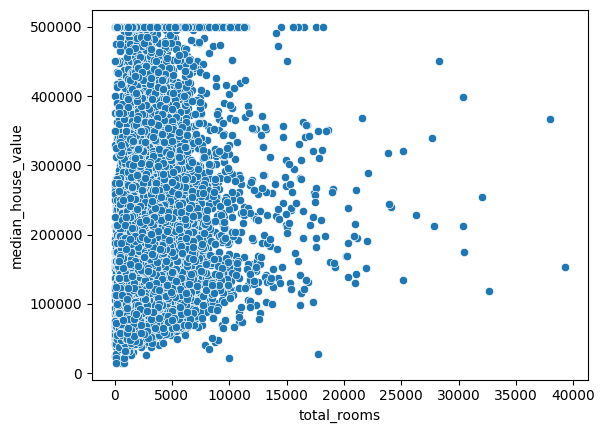

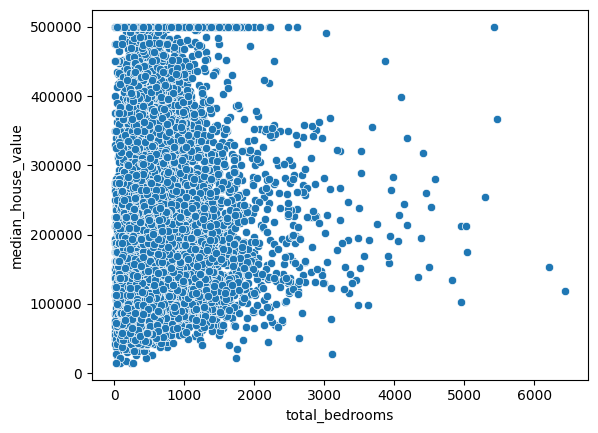

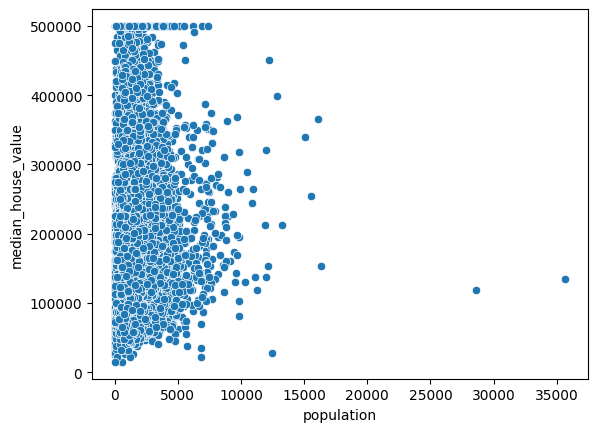

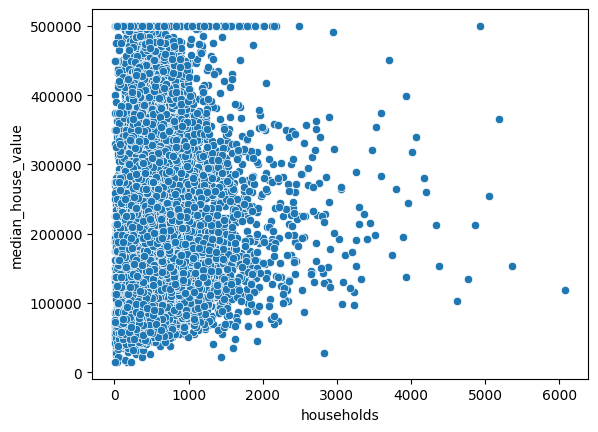

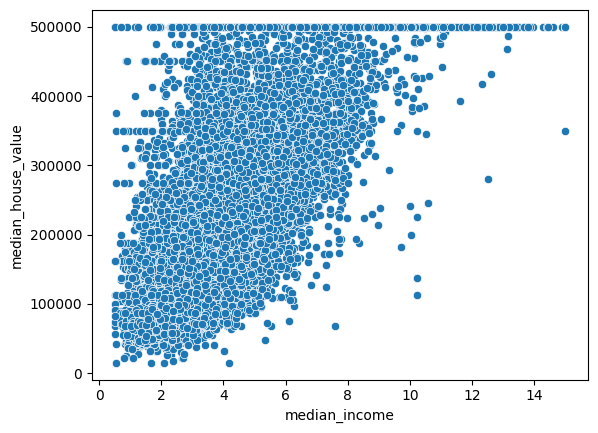

In [ ]:
for i in ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']:
       sns.scatterplot(data=df, x=i, y='median_house_value')
       plt.show()

<Axes: >

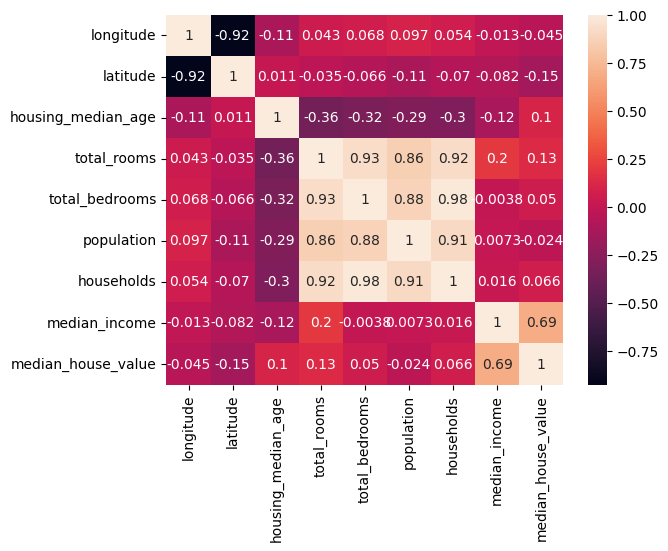

In [ ]:
## Correlation with heatmap to interpret the relation and mulicolinearity

s = df.select_dtypes(include=("number")).corr()
sns.heatmap(s,annot=True)

In [ ]:
## Converting Categorical Data into into Numerical Data using OneHotEncoding

df_cat=df.select_dtypes(np.object_)
df_cat

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
18560,INLAND
18561,INLAND
18562,INLAND
18563,INLAND


In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['ocean_proximity'] = label.fit_transform(df['ocean_proximity'])

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,3
2,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,3
3,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,3
4,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,3


In [ ]:
## Outliers Treatment

def wisker(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lw=q1-1.5*iqr
  uw=q3+1.5*iqr
  return lw,uw

In [ ]:
wisker(df['housing_median_age'])

(np.float64(-10.5), np.float64(65.5))

In [ ]:
for i in ['population','total_rooms','total_bedrooms','households']:
  lw,uw=wisker(df[i])
  df[i]=np.where(df[i]<lw,lw,df[i])
  df[i]=np.where(df[i]>uw,uw,df[i])


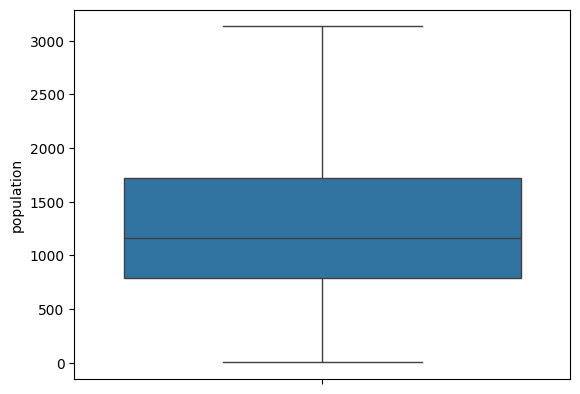

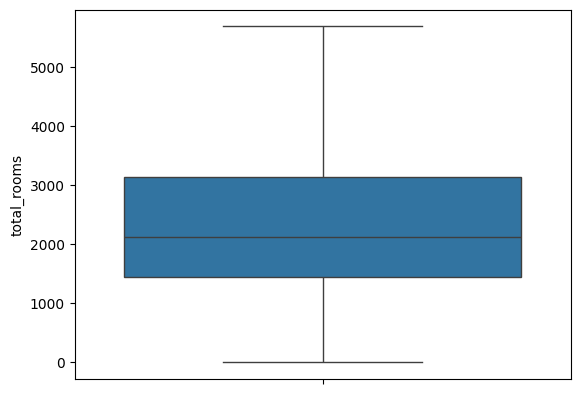

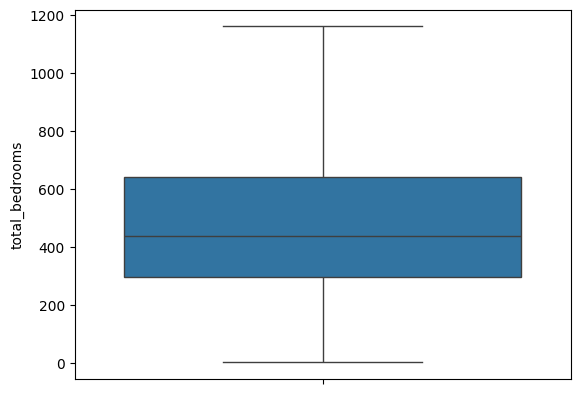

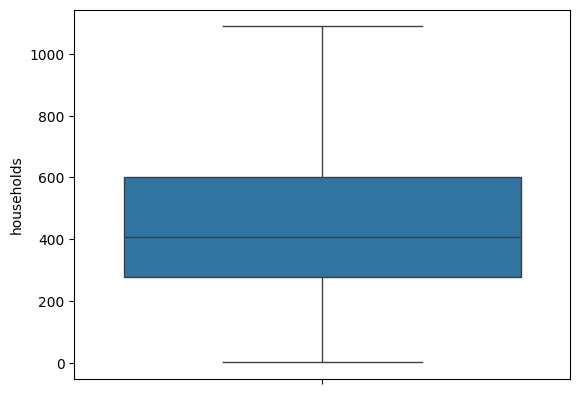

In [ ]:
for i in ['population','total_rooms','total_bedrooms','households']:
  sns.boxplot(df[i])
  plt.show()


In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3.0
1,-122.22,37.86,21.0,5689.5,1106.0,2401.0,1089.0,8.3014,358500.0,3.0
2,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0
3,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3.0
4,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,3.0
...,...,...,...,...,...,...,...,...,...,...
18560,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1.0
18561,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1.0
18562,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1.0
18563,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1.0


In [ ]:
## Split Dataset for Training and Testing

X = df[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity']]
y = df['median_house_value']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
len(X_train)


14852

In [ ]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2043,-119.82,36.79,18.0,5689.5,1162.0,3133.5,1089.0,1.6854,1.0
6849,-118.22,33.86,16.0,5689.5,1162.0,3133.5,1089.0,5.1948,0.0
12548,-117.12,34.21,19.0,4641.0,994.0,1334.0,474.0,4.5972,1.0
9385,-117.62,33.42,23.0,2656.0,515.0,998.0,435.0,4.0294,4.0
2588,-118.94,35.37,23.0,1106.0,252.0,790.0,230.0,1.8523,1.0
...,...,...,...,...,...,...,...,...,...
17419,-120.76,37.73,16.0,1343.0,241.0,732.0,195.0,3.5833,1.0
14418,-122.46,37.72,49.0,1207.0,255.0,658.0,220.0,4.0859,4.0
15379,-122.20,37.46,40.0,1723.0,208.0,976.0,209.0,9.8892,4.0
5670,-118.00,34.03,25.0,5689.5,1154.0,3133.5,1089.0,5.2570,0.0


In [ ]:
## Creating a Model

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
## Model Prediction

y_pred = model.predict(X_test)

In [ ]:
## Model Accuracy

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)*100

81.49637262719338

In [ ]:
## Using Another model (XGBRegressor)

from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
xgbr = XGBRegressor(verbosity=0)
print(xgbr)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)


In [ ]:
## Model Score

xgbr.fit(X_train, y_train)
score = xgbr.score(X_train, y_train)
print("Training score : ",score)

Training score :  0.942798909570281


In [ ]:
cv_score = cross_val_score(xgbr, X_train, y_train, cv=10)
print("CV Mean score : ", cv_score.mean())


CV Mean score :  0.8236408467459402


In [ ]:
y_pred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE : ", mse)
print("RMSE : ", mse**(1/2.0))



MSE :  2382529645.8043613
RMSE :  48811.16312693605


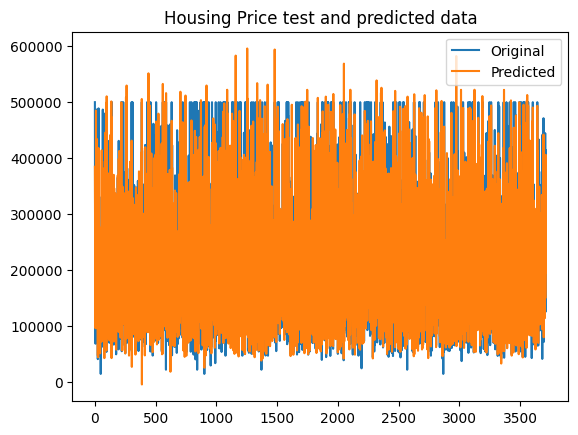

In [ ]:
X_test = range(len(y_test))
plt.plot(X_test, y_test, label="Original")
plt.plot(X_test, y_pred, label="Predicted")
plt.title("Housing Price test and predicted data")
plt.legend()
plt.show()
